In [1]:
# Caringal, Richard & Pagulayan, Christian (3CSC)
# Use decision trees on classification problem
# Customer churn - identify if a person would be a non-user or continue be a user given the features
# target variable: binary variable <- whether the customer left the bank or continues to be a customer

In [2]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("Churn_Modelling.csv")

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Preprocessing: inspect data for nulls, data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Get the number of null values in each feature
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#Get the number of unique records per feature to get categorical variables
#Remove RowNumber and CustomerId and Surname as it does not contribute to whether a customer stays or not
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

C:\SDKs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


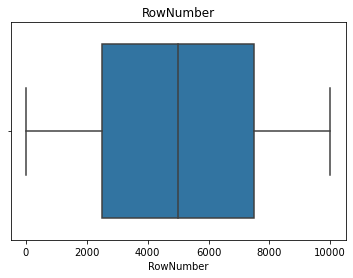

C:\SDKs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


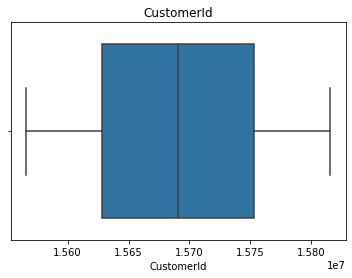

C:\SDKs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


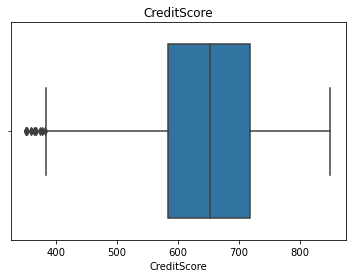

C:\SDKs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


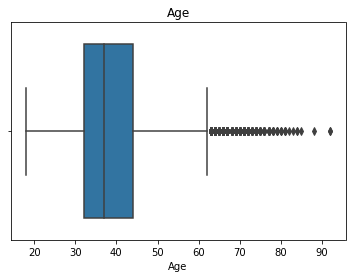

C:\SDKs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


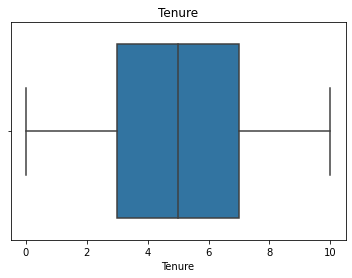

C:\SDKs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


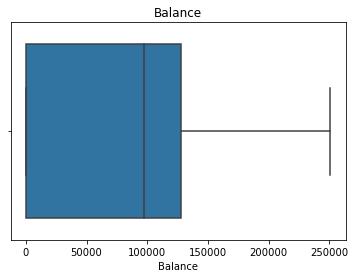

C:\SDKs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


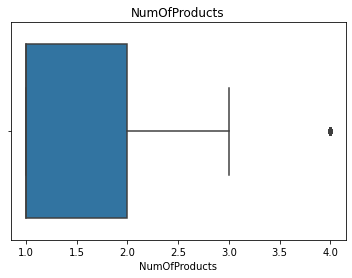

C:\SDKs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


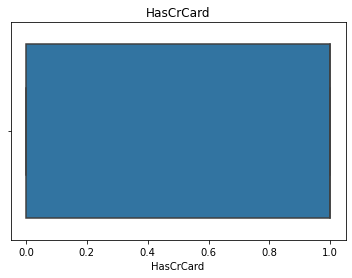

C:\SDKs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


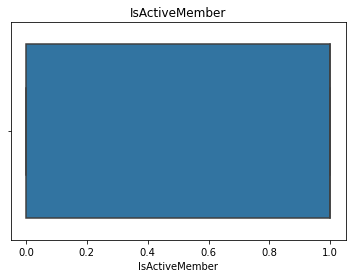

C:\SDKs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


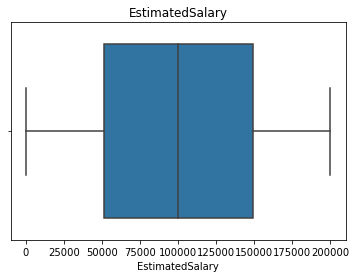

C:\SDKs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


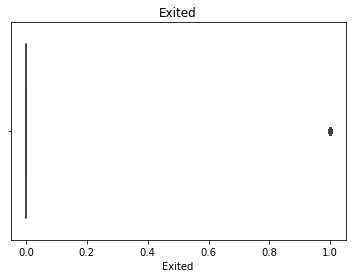

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in data.columns : 
  if ( (data[i].dtypes == 'int64') | (data[i].dtypes == 'float64') ):
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [10]:
data['balance_salary'] = data['Balance'] + data['EstimatedSalary']
data['NewTenure'] = data['Tenure']/data['Age']
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_salary,NewTenure
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,101348.88,0.047619
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,196350.44,0.024390
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,273592.37,0.190476
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,93826.63,0.025641
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,204594.92,0.046512


In [11]:
data.drop(['RowNumber','Surname'],axis = 1,inplace = True)
data.shape

(10000, 14)

In [12]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_salary,NewTenure
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,176576.129169,0.137936
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,85397.545238,0.089506
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,90.070000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,117726.840000,0.064516
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,177122.980000,0.129032
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,241020.117500,0.200000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,407730.850000,0.555556


In [13]:
data['Exited'].value_counts()
#There are more customer who stayed than exited

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
# Since there is an imbalance in the values: undersample
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data[data.Exited == 0]
minority_class = data[data.Exited == 1]

# Undersample majority class
majority_downsampled = resample(majority_class,
                                replace=False, # sample without replacement
                                n_samples=len(minority_class), # match minority n
                                random_state=42) # reproducible results

# Combine minority class and downsampled majority class
undersampled_data = pd.concat([majority_downsampled, minority_class])

# Shuffle the data#
data = undersampled_data.sample(frac=1, random_state=42)

In [15]:
data = pd.get_dummies(data)
data.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_salary,NewTenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3382,15570629,655,72,5,138089.97,2,1,1,99920.41,0,238010.38,0.069444,0,1,0,1,0
81,15663706,777,32,2,0.00,1,1,0,136458.19,1,136458.19,0.062500,1,0,0,1,0
511,15761043,632,38,6,86569.76,2,1,0,98090.91,0,184660.67,0.157895,0,1,0,1,0
9578,15810891,662,34,2,117731.79,2,0,1,55120.79,0,172852.58,0.058824,1,0,0,0,1
3105,15794566,678,28,4,0.00,2,1,1,144423.17,1,144423.17,0.142857,1,0,0,1,0


In [16]:
#Standardizing the features
#convert the values to the a standard scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [17]:
# these are the attributes which has values in and out of 0 and 1 range
scaling_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts','balance_salary','NewTenure'] 

data[scaling_cols] = scaler.fit_transform(data[scaling_cols])
data.head(2)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_salary,NewTenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3382,15570629,0.044776,2.285714,0.0,0.272732,1.0,1,1,-0.010825,0,0.447818,-0.418579,0,1,0,1,0
81,15663706,0.955224,-0.571429,-0.6,-0.796845,0.0,1,0,0.359316,1,-0.382108,-0.473940,1,0,0,1,0


In [18]:
# Drop exited as it is the target variable
# Drop CustomerId as it is does not contribute to the predictions
X = data.drop(['Exited','CustomerId'],axis =1)
Y = data.Exited #get Exited as target variable

# Splits features into a fraction of training and testing sets
# Here 20% is test set, 80% is training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
#Modelling: create decision tree model
#Criterion: use entropy for now for splitting
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=32)
clf = clf.fit(X_train, y_train)

In [20]:
#Evaluate the model (using different metrics)
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
print("Accuracy Score: %f" % accuracy_score(y_test, y_pred))
print("Recall Score: %f" % recall_score(y_test, y_pred))
print("Precision Score: %f" % precision_score(y_test, y_pred))
print("F1 Score: %f" % f1_score(y_test, y_pred))

Accuracy Score: 0.769325
Recall Score: 0.801956
Precision Score: 0.754023
F1 Score: 0.777251
